In [1]:
#Name : Pooja Reddy Mettu
#Banner Id : 916453840
#Dataset Number = 38

In [2]:
import pandas as pd
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import fpgrowth, association_rules
import seaborn as sns
import matplotlib.pyplot as plt


In [3]:
df = pd.read_csv('E:/assg/Grocery_Items_38.csv')

# Applying data cleaning to remove any missing values(NaN) in the dataset
Data_clean=df.apply(lambda x: x.dropna().to_list(), axis=1)
Data_cl= Data_clean.to_list()

In [4]:
#(c) Using minimum support = 0.01 and minimum confidence threshold = 0.1, what are the association rules you can extract from your dataset?

In [5]:
# Use FP-Growth algorithm to find frequent itemsets
te = TransactionEncoder()
te_ary = te.fit(Data_cl).transform(Data_cl)
df_encoded = pd.DataFrame(te_ary, columns=te.columns_)

# Find frequent itemsets with minimum support = 0.01 using FP-Growth
frequent_itemsets = fpgrowth(df_encoded, min_support=0.01, use_colnames=True)

In [6]:
# Generate association rules with minimum confidence = 0.1
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.1)
rules

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(rolls/buns),(whole milk),0.11125,0.156375,0.013875,0.124719,0.797564,-0.003522,0.963833,-0.222147
1,(other vegetables),(whole milk),0.11925,0.156375,0.013750,0.115304,0.737356,-0.004898,0.953576,-0.287965
2,(soda),(whole milk),0.09275,0.156375,0.010500,0.113208,0.723949,-0.004004,0.951322,-0.295921
3,(yogurt),(whole milk),0.08525,0.156375,0.011000,0.129032,0.825146,-0.002331,0.968606,-0.188084


In [7]:
#(d)Use minimum support values (msv): 0.001, 0.005, 0.01, 0.05 and minimum confidence threshold (mct): 0.05, 0.075, 0.1.

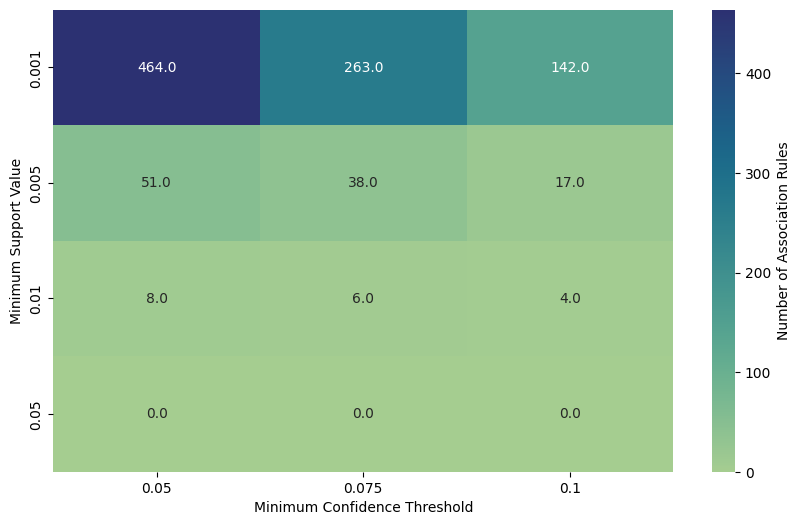

In [8]:
# Define support and confidence values to explore
support_values_msv = [0.001, 0.005, 0.01, 0.05]
confidence_values_mct = [0.05, 0.075, 0.1]

# Create an empty DataFrame to store the count results
count_results = pd.DataFrame(index=support_values_msv, columns=confidence_values_mct)

# Iterate through support and confidence values to find the number of association rules
for support in support_values_msv:
    for confidence in confidence_values_mct:
        frequent_itemsets = fpgrowth(df_encoded, min_support=support, use_colnames=True)
        rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=confidence)
        count_results.loc[support, confidence] = len(rules)


count_results_numeric = count_results.apply(pd.to_numeric, errors='coerce')
# Plot the heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(count_results_numeric, annot=True, fmt='.1f', cmap='crest', cbar_kws={'label': 'Number of Association Rules'})
plt.xlabel('Minimum Confidence Threshold')
plt.ylabel('Minimum Support Value')
plt.show()

In [9]:
#(e)List the association rule(s) (i.e., one or more rules depending on your dataset) that have the highest confidence for minimum support = 0.005.

In [10]:
# Find association rules with minimum support = 0.005
frequent_itemsets = fpgrowth(df_encoded, min_support=0.005, use_colnames=True)
rules = association_rules(frequent_itemsets, metric='confidence', min_threshold=0.1)

# Identify rules with the highest confidence
max_confidence_rule_is = rules[rules['confidence'] == rules['confidence'].max()]
max_confidence_rule_is

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
4,(newspapers),(whole milk),0.038125,0.156375,0.00575,0.15082,0.964474,-0.000212,0.993458,-0.036882


In [11]:
print("The highest confidence value for minimum support = 0.005 is 0.15082")

The highest confidence value for minimum support = 0.005 is 0.15082


In [12]:
# References
# 1. http://rasbt.github.io/mlxtend/user_guide/frequent_patterns/association_rules/
# 2. https://seaborn.pydata.org/generated/seaborn.heatmap.html

In [13]:
#2. [Image Classification using CNN] Construct a 4-class classification model using a convolutional neural network with the following simple architecture

In [15]:
import cv2 
import os
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Sequential,layers
from tensorflow.keras.layers import Dense,Flatten,Conv2D,MaxPool2D,Dropout,BatchNormalization
from tensorflow.keras.utils import to_categorical

In [20]:
# Define the paths to your image and annotation folders
image_folder = "D:/data mining assgn/Images1/"
annotation_folder = "D:/data mining assgn/Annotation/"

# Define the classes and map them to numerical labels
breed_classes = {
    "n02093256-Staffordshire_bullterrier": 0,
    "n02111277-Newfoundland": 1,
    "n02113023-Pembroke": 2,
    "n02115641-dingo": 3,
}

In [21]:
# Initialize empty lists to store image data and labels
breed_file = []
breed_labels = []

# Loop over the classes
for class_name, label in breed_classes.items():
    image_path = os.path.join(image_folder, class_name)
    annotation_path = os.path.join(annotation_folder, class_name)

    # Loop over the images in the current class
    for file in os.listdir(image_path):
        if file.endswith(".jpg"):  # Adjust the file extension based on your image format
            image = cv2.imread(os.path.join(image_path, file))
            breed_file.append(image)
            breed_labels.append(label)


In [22]:
# Convert the lists to arrays
x = np.array(breed_file)
y = np.array(breed_labels)

In [23]:
# Convert labels to one-hot encoded format
y = to_categorical(y, num_classes=len(breed_classes))

In [24]:
# Training and testing the dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [37]:
# CNN Model Building based on the given architecture

model = keras.Sequential(
    [
        keras.layers.Conv2D(8, (3, 3), activation="relu", input_shape=(256, 256, 3)),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dense(16, activation="relu"),
        keras.layers.Dense(len(breed_classes), activation="softmax"),
    ]
)

model.summary()

model.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

models = model.fit(
    x=x_train, y=y_train, validation_split=0.2, batch_size=32, epochs=20
)

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 254, 254, 8)       224       
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 127, 127, 8)       0         
 g2D)                                                            
                                                                 
 flatten_8 (Flatten)         (None, 129032)            0         
                                                                 
 dense_15 (Dense)            (None, 16)                2064528   
                                                                 
 dense_16 (Dense)            (None, 4)                 68        
                                                                 
Total params: 2064820 (7.88 MB)
Trainable params: 2064820 (7.88 MB)
Non-trainable params: 0 (0.00 Byte)
________________

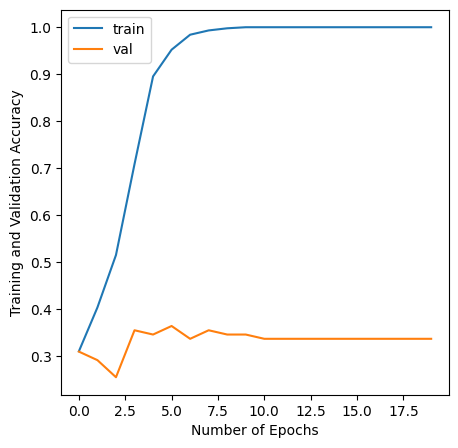

In [38]:
# Plotting the learning curves for the above model
import matplotlib.pyplot as plt

fig, axs = plt.subplots(figsize=(5, 5))

# Plot the training accuracy
axs.plot(models.history["accuracy"], label="train")
axs.plot(models.history["val_accuracy"], label="val")
axs.set_xlabel("Number of Epochs")
axs.set_ylabel("Training and Validation Accuracy")
axs.legend()
plt.show()

In [43]:
# My Rowan Banner ID ends with 0, so I'm doing experiment (a) - Train the CNN using 2 other filter sizes: 5 × 5 and 7 × 7

# Experiment (a) - 5 × 5 filter size
model2 = keras.Sequential(
    [
        keras.layers.Conv2D(8, (5, 5), activation="relu", input_shape=(256, 256, 3)),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dense(16, activation="relu"),
        keras.layers.Dense(len(breed_classes), activation="softmax"),
    ]
)

model2.summary()

model2.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

models2 = model2.fit(x=x_train, y=y_train, validation_split=0.2, batch_size=128, epochs=20)

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_11 (Conv2D)          (None, 252, 252, 8)       608       
                                                                 
 max_pooling2d_11 (MaxPooli  (None, 126, 126, 8)       0         
 ng2D)                                                           
                                                                 
 flatten_11 (Flatten)        (None, 127008)            0         
                                                                 
 dense_21 (Dense)            (None, 16)                2032144   
                                                                 
 dense_22 (Dense)            (None, 4)                 68        
                                                                 
Total params: 2032820 (7.75 MB)
Trainable params: 2032820 (7.75 MB)
Non-trainable params: 0 (0.00 Byte)
_______________

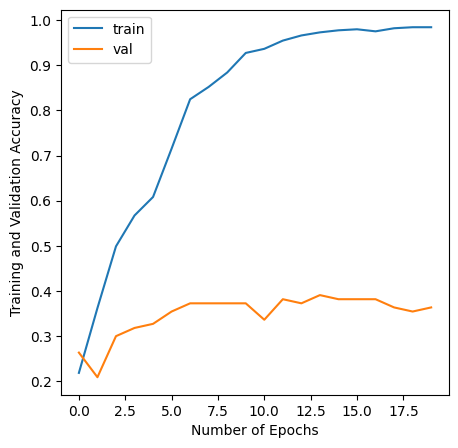

In [44]:
# Plotting the learning curves for the above model
fig, axs = plt.subplots(figsize=(5, 5))

# Plot the training accuracy
axs.plot(models2.history["accuracy"], label="train")
axs.plot(models2.history["val_accuracy"], label="val")
axs.set_xlabel("Number of Epochs")
axs.set_ylabel("Training and Validation Accuracy")
axs.legend()
plt.show()

In [29]:
# Experiment (a) - 7 × 7 filter size
model3 = keras.Sequential(
    [
        keras.layers.Conv2D(8, (7, 7), activation="relu", input_shape=(256, 256, 3)),
        keras.layers.MaxPooling2D(pool_size=(2, 2)),
        keras.layers.Flatten(),
        keras.layers.Dense(16, activation="relu"),
        keras.layers.Dense(len(breed_classes), activation="softmax"),
    ]
)

model3.summary()

model3.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

models3 = model3.fit(x=x_train, y=y_train, validation_split=0.2, batch_size=128, epochs=20)

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 250, 250, 8)       1184      
                                                                 
 max_pooling2d_4 (MaxPoolin  (None, 125, 125, 8)       0         
 g2D)                                                            
                                                                 
 flatten_4 (Flatten)         (None, 125000)            0         
                                                                 
 dense_7 (Dense)             (None, 16)                2000016   
                                                                 
 dense_8 (Dense)             (None, 4)                 68        
                                                                 
Total params: 2001268 (7.63 MB)
Trainable params: 2001268 (7.63 MB)
Non-trainable params: 0 (0.00 Byte)
________________

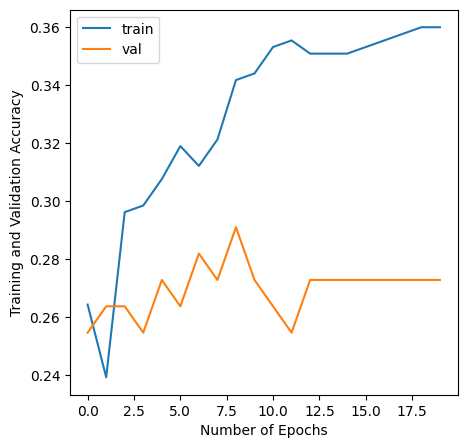

In [30]:
# Plotting the learning curves for the above model
fig, axs = plt.subplots(figsize=(5, 5))

# Plot the training accuracy
axs.plot(models3.history["accuracy"], label="train")
axs.plot(models3.history["val_accuracy"], label="val")
axs.set_xlabel("Number of Epochs")
axs.set_ylabel("Training and Validation Accuracy")
axs.legend()
plt.show()

In [47]:
print("Based on my observation by the performace, the first model has high accuracy compared to that of the other two models so, it's overfitting")
#For 5x5 
print("Based on my observation, all the models 5x5 and 7x7 are also overfitting, having high traning accuracies")

Based on my observation by the performace, the first model has high accuracy compared to that of the other two models so, it's overfitting
Based on my observation, all the models 5x5 and 7x7 are also overfitting, having high traning accuracies


In [48]:
# References
# 1. https://keras.io/examples/vision/mnist_convnet/
# 2. https://www.tensorflow.org/api_docs/python/tf/keras/utils/to_categorical
# 3. https://www.tensorflow.org/guide/keras/train_and_evaluatehttps://www.tensorflow.org/guide/keras/train_and_evaluate
# 4. https://www.tensorflow.org/guide/keras/train_and_evaluate
# 5. https://towardsdatascience.com/a-simple-cnn-multi-image-classifier-31c463324fa